<a href="https://colab.research.google.com/github/data-better/ASL/blob/master/MNIST%2C_CNN%2C_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* MNIST 숫자 이미지인식과 관련된 CNN 프로그램을 Pytorch로 작성하려고 해. 코드 작성해 줄 수 있나요?
* 위 프로그램에서 MNIST 데이터를 불러와서 학습데이터와 시험데이터로 나누는 것을 포함해서 다시 코드를 작생해줘. 
* 프로그램에서 시험 데이터 중 2개의 이미지를 보여주고, 실제로 어떻게 식별했는지 보여주도록 코드를 개선해줘.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# MNIST 데이터를 불러오고 학습 데이터와 테스트 데이터로 나눕니다.
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# 훈련 데이터와 테스트 데이터를 미니 배치로 로드합니다.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

# CNN 모델을 만듭니다.
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(32 * 7 * 7, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10)
)

# 모델을 학습합니다.
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(10):
    for i, (images, labels) in enumerate(train_loader):
        # 이미지를 모델에 전달하고 예측을 합니다.
        predictions = model(images)

        # 손실 함수를 계산합니다.
        loss = criterion(predictions, labels)

        # 손실 함수에 대해 모델을 업데이트합니다.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 100번의 에포크마다 진행 상황을 표시합니다.
        if i % 100 == 99:
            print('Epoch {}: Loss {:.4f}'.format(epoch + 1, loss.item()))

# 모델을 테스트합니다.
correct = 0
total = 0

for images, labels in test_loader:
    # 이미지를 모델에 전달하고 예측을 합니다.
    predictions = model(images)

    # 예측이 실제 레이블과 일치하는지 확인합니다.
    correct += (predictions.argmax(1) == labels).sum().item()
    total += labels.size(0)

# 정확도를 계산합니다.
accuracy = 100 * correct / total
print('Accuracy: {:.2f}%'.format(accuracy))

# 테스트 데이터 중 2개의 이미지를 표시하고 실제로 어떻게 식별했는지 보여줍니다.
for i in range(2):
    image, label = test_dataset[i]
    prediction = model(image.unsqueeze(0))
    print('Label: {}'.format(label))
    print('Prediction: {}'.format(prediction.argmax(1)))
    plt.imshow(image.squeeze())
    plt.show()


Epoch 1: Loss 0.3241
Epoch 1: Loss 0.2499
Epoch 1: Loss 0.2576
Epoch 1: Loss 0.1255
Epoch 1: Loss 0.1127
Epoch 1: Loss 0.0682
Epoch 2: Loss 0.0694
Epoch 2: Loss 0.0399
Epoch 2: Loss 0.0692
Epoch 2: Loss 0.1774
Epoch 2: Loss 0.0807
Epoch 2: Loss 0.0580
Epoch 3: Loss 0.0849
Epoch 3: Loss 0.0164
Epoch 3: Loss 0.0442
Epoch 3: Loss 0.0406
Epoch 3: Loss 0.0120
Epoch 3: Loss 0.0887
Epoch 4: Loss 0.0641
Epoch 4: Loss 0.0071
Epoch 4: Loss 0.0590
Epoch 4: Loss 0.0124
Epoch 4: Loss 0.0297
Epoch 4: Loss 0.0593
Epoch 5: Loss 0.0123
Epoch 5: Loss 0.0074
Epoch 5: Loss 0.0417
Epoch 5: Loss 0.0474
Epoch 5: Loss 0.0247
Epoch 5: Loss 0.0715
Epoch 6: Loss 0.0174
Epoch 6: Loss 0.0187
Epoch 6: Loss 0.0025
Epoch 6: Loss 0.0241
Epoch 6: Loss 0.0650
Epoch 6: Loss 0.0225
Epoch 7: Loss 0.0192
Epoch 7: Loss 0.0150
Epoch 7: Loss 0.0153
Epoch 7: Loss 0.0573
Epoch 7: Loss 0.0157
Epoch 7: Loss 0.0022
Epoch 8: Loss 0.0451
Epoch 8: Loss 0.0145
Epoch 8: Loss 0.0018
Epoch 8: Loss 0.0087
Epoch 8: Loss 0.0248
Epoch 8: Loss

NameError: ignored

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/pytorch/tutorials">https://github.com/pytorch/tutorials</a> subject to BSD - 3 - Clause</li>
  <li><a href="https://github.com/1183830041/python">https://github.com/1183830041/python</a></li>
  <li><a href="https://github.com/shiftan/simple_sagemaker">https://github.com/shiftan/simple_sagemaker</a> subject to Apache - 2.0</li>
  <li><a href="https://github.com/Lagostra/exprimo-placement-experiments">https://github.com/Lagostra/exprimo-placement-experiments</a></li>
  </ol>
</div>

In [ ]:
import matplotlib.pyplot as plt

Label: 7
Prediction: tensor([7])


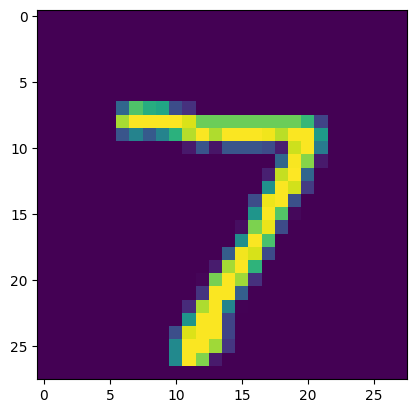

Label: 2
Prediction: tensor([2])


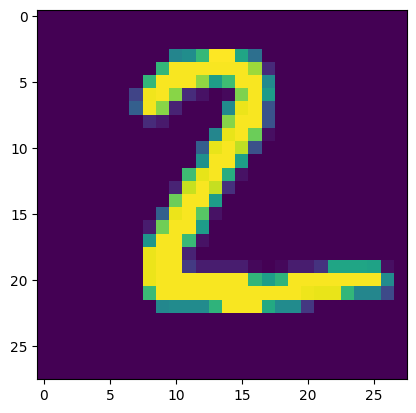

In [ ]:
# 테스트 데이터 중 2개의 이미지를 표시하고 실제로 어떻게 식별했는지 보여줍니다.
for i in range(2):
    image, label = test_dataset[i]
    prediction = model(image.unsqueeze(0))
    print('Label: {}'.format(label))
    print('Prediction: {}'.format(prediction.argmax(1)))
    plt.imshow(image.squeeze())
    plt.show()